[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.2.1 Szenarien Überblick

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [2]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
from FLUCCOplus.notebooks import *

from FLUCCOplus import scenarios

#import scenario xlsx
# clean
# plot energy balance

FLUCCOplus.config  loaded!
FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


In [4]:
sc_raw = pd.read_excel("../data/szenarien/szenarien_w2s.xlsx",
                   sheet_name="scenarios",
                   index_col=0, skiprows=range(1,3))


C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [5]:
sc = (sc_raw
        .pipe(scenarios.start_pipeline)
        .pipe(scenarios.NaNtoZero)
        .pipe(scenarios.format_df)
        .pipe(scenarios.convert_PJ_to_GWH)
 )

start_pipeline took 0:00:00 for (13, 15) df
NaNtoZero took 0:00:00 for (13, 15) df
format_df took 0:00:00.001994 for (13, 15) df
convert_PJ_to_GWH took 0:00:00.003962 for (13, 15) df


### Endenergie Erzeugung nach Energieträgern

In [6]:
all = ['Jahr', 'Strombedarf', 'Mismatch', 'Importe', 'Stromproduktion',
       'Wasserkraft', 'Windkraft', 'Photovoltaik', 'Volatile EE',
       'Nicht-Volatile', 'Laufkraft', 'Pumpspeicher', 'RES0', 'RES1', 'RES2']

pp_carriers = ['Laufkraft','Windkraft', 'Photovoltaik', 'Pumpspeicher', 'Nicht-Volatile']

[Text(0, 0.5, 'Endenergie [GWh/a]')]

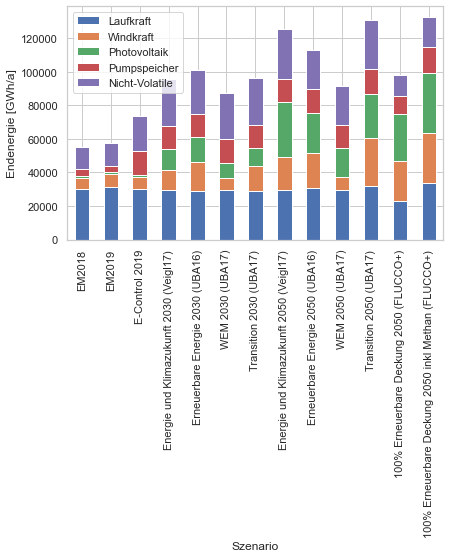

In [7]:

fig, ax = plt.subplots(1,1)

sc[pp_carriers].plot(kind="bar", stacked=True, rot=90, ax=ax)
ax.set(ylabel="Endenergie [GWh/a]")

### Anteil Erneuerbarer Stromerzeugung am Endenergiemix

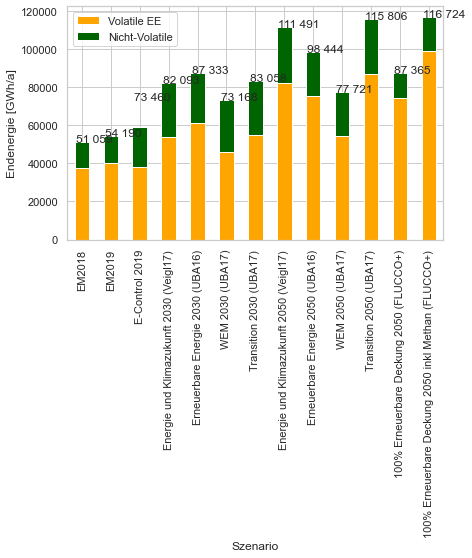

In [8]:
fig, ax = plt.subplots(1,1)
sc[["Volatile EE", "Nicht-Volatile"]].plot(ax=ax,kind="bar", stacked=True, color=["orange", "darkgreen"])
ax.set(ylabel="Endenergie [GWh/a]")
for i, label in enumerate(list(sc.index)):
    score = sc.loc[label, "Stromproduktion"]
    ax.annotate(f"{f'{score:,.0f}'.replace(',',' ')}", (i - 0.2, score))

 Ermittlung der Jahres-Skalierungsfaktoren

Prinzipiell können natürlich alle Szenarien als Skalierungsgröße verwendet werden. Unser Szenario-Letztstand,
der auf der [EnInnov 2020 Graz](https://www.tugraz.at/events/eninnov2020/nachlese/download-beitraege/stream-a/)
 vorgestellt wurde, ist die Variante "Streicher 2b". Das entspricht dem ursprünglichen Szenario [Streicher, et al. 2011] mit folgenden
 Adaptionen:
 * Reallokation der Energie aus Geothermie zu jeweils 50/50 auf Windkraft/PV, Methanisierung nur auf Windkraft (Streicher 2a)
 * Endenergiebedarf der Mobilität aus UBA17  herangezogen, Landwirtschaft ergänzt